In [1]:
import pandas as pd
filePathWHO = 'Data/WHO-COVID-19-global-data.csv'
who = pd.read_csv(filePathWHO)
#includes new cases, new deaths, total cases, and total deaths for most countries

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
filePathTestsFull = 'Data/full-list-total-tests-for-covid-19.csv'
covid_tests = pd.read_csv(filePathTestsFull)

#source: https://ourworldindata.org/grapher/full-list-total-tests-for-covid-19

In [4]:
who['Date_reported'] =  pd.to_datetime(who['Date_reported'], format='%m/%d/%Y')
covid_tests['Date'] = pd.to_datetime(covid_tests.Date)
#convert the date format of covid_tests to be the same as in WHO data

In [5]:
who = who.replace(['United States of America',
                   'Bolivia (Plurinational State of)',
                   'Czechia','Iran (Islamic Republic of)',
                   'Russian Federation', 'Republic of Korea',
                   'The United Kingdom',
                   'Viet Nam'], ['United States',
                                 'Bolivia',
                                 'Czech Republic',
                                 'Iran',
                                 'Russia',
                                 'South Korea',
                                 'United Kingdom',
                                 'Vietnam'])
covid_tests = covid_tests.replace(['France, tests performed',
 'Ghana, people tested',
 'India, people tested',
 'Singapore, samples tested',
 'Thailand, people tested'], ['France',
                              'Ghana',
                              'India',
                              'Singapore',
                              'Thailand'])

In [6]:
who_tests_merged = covid_tests.merge(who, left_on=['Entity','Date'], right_on=['Country','Date_reported'])
who_tests_merged = who_tests_merged.drop(['Entity', 'Date_reported', 'Country_code'], axis=1)
who_tests_merged['New tests'] = 0

In [7]:
for i in range(who_tests_merged['Country'].size):
    if i>0:
        if (who_tests_merged['Country'][i-1] == who_tests_merged['Country'][i]):
            who_tests_merged['New tests'][i] = (who_tests_merged['Total tests'][i]-who_tests_merged['Total tests'][i-1])
#Note, takes ~3 min to run as is

C:\Users\nic_v\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
xs = who_tests_merged['Cumulative_cases']
ys = who_tests_merged['Total tests']
print('Pearson value for total cases and total tests of all countries:')
print(stats.pearsonr(xs,ys)[0])
print('Spearman value for total cases and total tests of all countries:')
print(stats.spearmanr(xs,ys)[0])

Pearson value for total cases and total tests of all countries:
0.9222211340936356
Spearman value for total cases and total tests of all countries:
0.8751822769092304


In [9]:
xsr = who_tests_merged['New_cases']
ysr = who_tests_merged['New tests']
print('Pearson value for new cases and new tests of all countries:')
print(stats.pearsonr(xsr,ysr)[0])
print('Spearman value for new cases and new tests of all countries:')
print(stats.spearmanr(xsr,ysr)[0])

Pearson value for new cases and new tests of all countries:
0.7691987665230835
Spearman value for new cases and new tests of all countries:
0.6607317347947645


In [10]:
xus = who_tests_merged.loc[who_tests_merged['Country'] == 'United States']['Cumulative_cases']
yus = who_tests_merged.loc[who_tests_merged['Country'] == 'United States']['Total tests']
print('Pearson value for total cases and total tests in the US:')
print(stats.pearsonr(xus,yus)[0])
print('Spearman value for total cases and total tests in the US:')
print(stats.spearmanr(xus,yus)[0])

Pearson value for total cases and total tests in the US:
0.9741862456385783
Spearman value for total cases and total tests in the US:
0.9999871245279883


In [11]:
xus2 = who_tests_merged.loc[who_tests_merged['Country'] == 'United States']['New_cases']
yus2 = who_tests_merged.loc[who_tests_merged['Country'] == 'United States']['New tests']
print('Pearson value for new cases and new tests in the US:')
print(stats.pearsonr(xus2,yus2)[0])
print('Spearman value for new cases and new tests in the US:')
print(stats.spearmanr(xus2,yus2)[0])

Pearson value for new cases and new tests in the US:
0.6854279491935551
Spearman value for new cases and new tests in the US:
0.5318661294857983


In [12]:
xnz = who_tests_merged.loc[who_tests_merged['Country'] == 'New Zealand']['Cumulative_cases']
ynz = who_tests_merged.loc[who_tests_merged['Country'] == 'New Zealand']['Total tests']
print('Pearson value for total cases and total tests in New Zealand:')
print(stats.pearsonr(xnz,ynz)[0])
print('Spearman value for total cases and total tests in New Zealand:')
print(stats.spearmanr(xnz,ynz)[0])

Pearson value for total cases and total tests in New Zealand:
0.7141574962311737
Spearman value for total cases and total tests in New Zealand:
0.99601154367086


In [13]:
xnz2 = who_tests_merged.loc[who_tests_merged['Country'] == 'New Zealand']['New_cases']
ynz2 = who_tests_merged.loc[who_tests_merged['Country'] == 'New Zealand']['New tests']
print('Pearson value for new cases and new tests in New Zealand:')
print(stats.pearsonr(xnz2,ynz2)[0])
print('Spearman value for new cases and new tests in New Zealand:')
print(stats.spearmanr(xnz2,ynz2)[0])

Pearson value for new cases and new tests in New Zealand:
-0.1821895929177977
Spearman value for new cases and new tests in New Zealand:
0.0021873867473263258


In [16]:
output_US = who_tests_merged.loc[who_tests_merged['Country'] == 'United States'][['Cumulative_cases', 'Total tests', 'New_cases', 'New tests']]

In [20]:
output_NZ = who_tests_merged.loc[who_tests_merged['Country'] == 'New Zealand'][['Cumulative_cases', 'Total tests', 'New_cases', 'New tests']]

Text(0.5, 1.0, 'Total COVID Cases and Tests in the US')

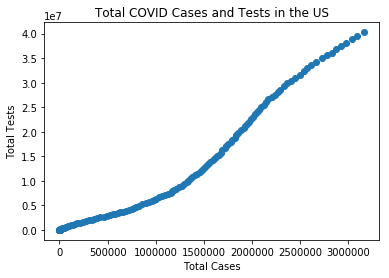

In [25]:
x1 = output_US['Cumulative_cases']
y1 = output_US['Total tests']
plt.plot(x1, y1,'o')
plt.ylabel('Total Tests')
plt.xlabel('Total Cases')
plt.title('Total COVID Cases and Tests in the US')

Text(0.5, 1.0, 'New COVID Cases and Tests in the US')

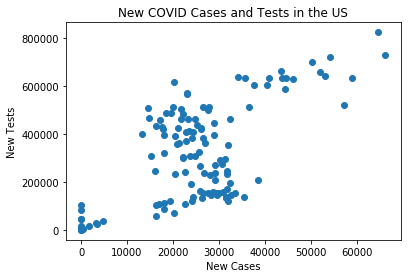

In [28]:
x2 = output_US['New_cases']
y2 = output_US['New tests']
plt.plot(x2, y2,'o')
plt.ylabel('New Tests')
plt.xlabel('New Cases')
plt.title('New COVID Cases and Tests in the US')

Text(0.5, 1.0, 'Total COVID Cases and Tests in NZ')

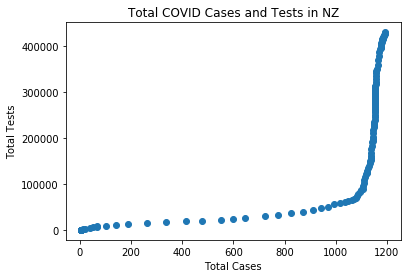

In [26]:
x3 = output_NZ['Cumulative_cases']
y3 = output_NZ['Total tests']
plt.plot(x3, y3,'o')
plt.ylabel('Total Tests')
plt.xlabel('Total Cases')
plt.title('Total COVID Cases and Tests in NZ')

Text(0.5, 1.0, 'New COVID Cases and Tests in NZ')

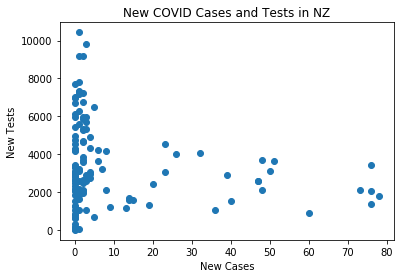

In [27]:
x4 = output_NZ['New_cases']
y4 = output_NZ['New tests']
plt.plot(x4, y4,'o')
plt.ylabel('New Tests')
plt.xlabel('New Cases')
plt.title('New COVID Cases and Tests in NZ')